In [167]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
#!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

In [168]:
import pandas as pd
import numpy as np
import nltk

from nltk import word_tokenize

In [169]:
#nltk.download('punkt')

In [170]:
df = pd.read_csv('bbc_text_cls.csv')

In [171]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [172]:
pd.unique(df["labels"])

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [173]:
idx = 0
word2idx = {}
tokenized_docs = []
for doc in df['text']:
  words = word_tokenize(doc.lower())
  doc_as_int = []
  for word in words:
    if word not in word2idx:
      word2idx[word] = idx
      idx += 1

    doc_as_int.append(word2idx[word])
  tokenized_docs.append(doc_as_int)

In [174]:
# reverse mapping
# if you do it smarter you can store it as a list
#idx2word = {v:k for k, v in word2idx.items()}
idx2word = [v for v, n in word2idx.items()]

In [175]:
# number of documents
N = len(df['text'])

In [176]:
# number of words
V = len(word2idx)

In [177]:
tf = np.zeros((N, V))
tf.shape

(2225, 34762)

In [178]:
for i, doc_as_int in enumerate(tokenized_docs):
  for j in doc_as_int:
    tf[i, j] += 1

In [179]:
# compute IDF
document_freq = np.sum(tf > 0, axis=0) # document frequency (shape = (V,))
idf = np.log(N / document_freq)

In [180]:
tf_idf = tf * idf
np.random.seed(123)

In [181]:
# pick a random document, show the top 5 terms (in terms of tf_idf score)
i = np.random.choice(N)
row = df.iloc[i]
print("Label:", row['labels'])
print("Text:", row['text'].split("\n", 1)[0])
print("Top 5 terms:")

scores = tf_idf[i]
indices = (-scores).argsort()

for j in indices[:10]:
  print(idx2word[j])

Label: sport
Text: Athens memories soar above lows
Top 5 terms:
paula
athens
1500m
her
kelly
race
i
marathon
thing
athletics


disposal
molina
articulated
soften
publicist
darker
confounded
bosom
characterised
zeitgeist


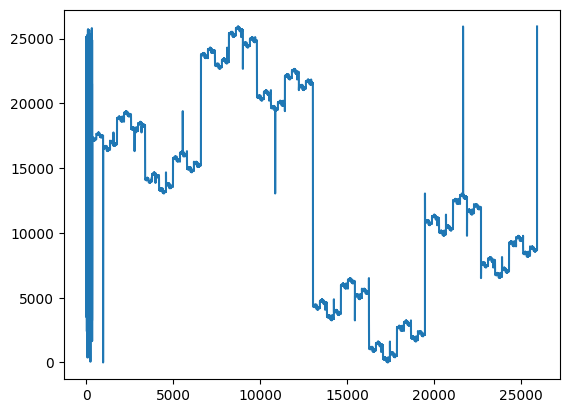

In [182]:
# Exercise: use CountVectorizer to form the counts instead
# Exercise (hard): use Scipy's csr_matrix instead
# You cannot use X[i, j] += 1 here

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

inputs = df['text']
labels = df['labels']
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
vectorizer = CountVectorizer(stop_words = "english")
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
scores = Xtrain[i]
scores = scores.toarray()
scores = scores.flatten()
indices = (-scores).argsort()
for j in indices[:10]:
  print(idx2word[j])
plt.plot(indices);

disposal
molina
articulated
soften
publicist
darker
confounded
bosom
characterised
zeitgeist


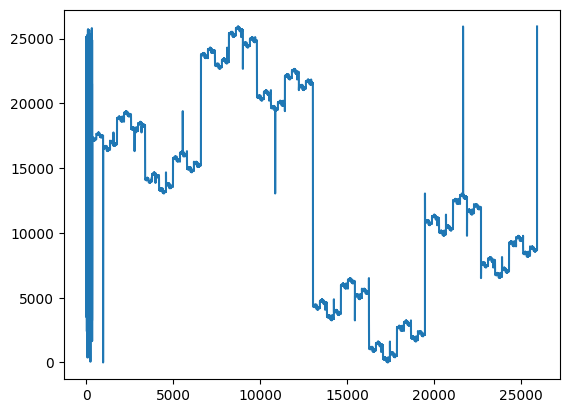

In [183]:
scores = csr_matrix(Xtrain[i]).toarray()
scores = scores.flatten()
indices = (-scores).argsort()
for j in indices[:10]:
  print(idx2word[j])
plt.plot(indices);